Real time output: 1 0.2153846152375295 954829836155855.0 5.319766405544558e+16
Real time output: 2 0.23195266231639838 392382627121346.6 2.0299796155735988e+16
Real time output: 3 0.2497951743871715 161247709506895.16 7746237176042913.0
Real time output: 4 0.2690101871042216 66263951287655.77 2955901118645687.5
Real time output: 5 0.2897032772484313 27230843238992.293 1127947824744550.8
Real time output: 6 0.3119881427610352 11190379870348.842 430415711757429.1
Real time output: 7 0.33598722735954073 4598630708060.877 164243130981771.78
Real time output: 8 0.3618323931407026 1889784089029.454 62673840070239.67
Real time output: 9 0.38966564482084515 776597090631.2198 23915825709927.324
Real time output: 10 0.4196399095167304 319138502129.06647 9126083357696.447
Real time output: 11 0.4519198762235629 131148233709.1126 3482438428856.738
Real time output: 12 0.4866828993877515 53894615538.723145 1328869719758.0361
Real time output: 13 0.5241199711781022 22147658828.186546 507085598212.86

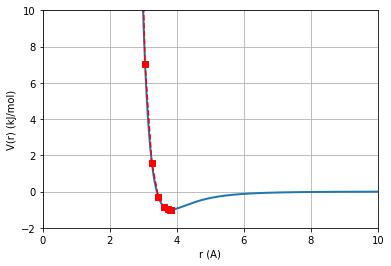

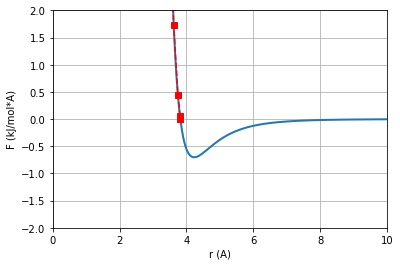

The equilibrim separation is  3.8163704753523646 (in Angs) with potential minimum at  -0.9969999999994111 (in kJ/mol).


In [1]:
import matplotlib.pylab as plt
import numpy as np


# This code uses NR method to determine the equilibrium separation of two Xe atoms
# The energy potential used is the Lennard-Jones

# defining parameters
epsilon = 0.997 #kJ/mol
sigma = 3.4 #Angs

# defining tolerance
tol = 1e-4

# Define all functions for NR method which include:
# (i) The Lennard-Jones potential, V(r)
# (ii) The force defined as -dV/dr
# (iii) Second derivative of V(r)

def v(x):
    '''Lennard-Jones potential'''
    return 4*epsilon * ( (sigma/x)**12 - (sigma/x)**6 )

def dv(x):
    '''First derivative of v(x)'''
    return 4*epsilon * ( sigma**12 * (-12)*x**(-13)  - sigma**6 * (-6)*x**(-7)  )

def d2v(x):
    '''Second derivative of v(x)'''
    return 4*epsilon * ( sigma**12 * (-12)*(-13)*x**(-14) - sigma**6 * (-6)*(-7)*x**(-8) )


# array of r values (separation between the atoms)
r = np.arange(0.01, 10.0, 0.01)

# force array for the sake of plotting
force = -dv(r)

# initial condition for the NR method
r0 = 0.2

# number of steps counter
nstep = 0

# lists to store computed separations (from NR), v(x), the force
list_r = [r0]
list_v = [v(r0)]
list_f = [-dv(r0)]


# initiating NR block: while loop runs until abs(dv(x)) < tol.
while abs(dv(r0)) > tol:
    nstep += 1    
    r0 = r0 - dv(r0)/d2v(r0)

    list_r.append(r0)
    list_v.append(v(r0))
    list_f.append(-dv(r0))

    print('Real time output:', nstep, r0, v(r0), -dv(r0))
    
# plotting instructions
# plot of the potential plus convergence to the minimum
plt.figure()
plt.axis([0, 10, -2, 10])
plt.xlabel('r (A)')
plt.ylabel('V(r) (kJ/mol)')
plt.grid()
plt.plot(r, v(r), linewidth=2)
plt.plot(list_r, list_v, 'rs--')

plt.figure()
plt.axis([0, 10, -2, 2])
plt.plot(r, force, linewidth=2)
plt.plot(list_r, list_f, 'rs--')
plt.xlabel('r (A)')
plt.ylabel('F (kJ/mol*A)')
plt.grid()
plt.show()
    
print('The equilibrim separation is ', r0, '(in Angs) with potential minimum at ', v(r0), '(in kJ/mol).')